In [1]:
# Import libraries:
import pandas as pd
import importlib
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot
import reporting_module as bh_report
import mapping_dict_PCI as rad_pci_dict

# Make sure personal libraries are reloaded incase of adjustments:
importlib.reload(bh_utils)
importlib.reload(bh_map)
importlib.reload(bh_plot)
importlib.reload(bh_report)
importlib.reload(rad_pci_dict)

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'

# Import the data:
df_ids7 = pd.read_excel(path + 'PCI\IDS7\KUL_KRH_PCI.xlsx')
df_dt = pd.read_excel(path + 'PCI\DoseTrack\DoseTrack KRH_XA.xlsx')
del path, hostname

# Convert all variants of the ['Rom/modalitet (RIS)'] to the standard lab name:
# Convert values of 'KRH_XA3_Coroventis' to 'KRH_XA3':
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA3_Coroventis', 'KRH_XA3')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA3_IVUS', 'KRH_XA3')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA3_OCT', 'KRH_XA3')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_Intrasight', 'KRH_XA7')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_Coroventis', 'KRH_XA7')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_IVUS', 'KRH_XA7')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_OCT', 'KRH_XA7')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA8_Coroventis', 'KRH_XA8')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA8_IVUS', 'KRH_XA8')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA8_OCT', 'KRH_XA8')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_Coroventis', 'KUL_XA1')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_IVUS', 'KUL_XA1')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_OCT', 'KUL_XA1')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_MacLab', 'KUL_XA1')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA2_IVUS', 'KUL_XA2')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA2_OCT', 'KUL_XA2')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA2_MacLab', 'KUL_XA2')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA4_IVUS', 'KUL_XA4')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA4_OCT', 'KUL_XA4')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA4_MacLab', 'KUL_XA4')

# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)
# Get the mapping dictionary:
mapping_dict = rad_pci_dict.get_PCI_mapping_dict()
# First we perform mapping on selected procedures:
data = bh_map.map_procedures(data, mapping_dict, True)

del df_dt, df_ids7, mapping_dict

Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 1
Number of cancelled procedures: 418
Number of non-human subjects: 3
Number of rows with invalid accession number: 1
8029    NNUL000009420412
Name: Henvisnings-ID, dtype: object
Number of accession numbers in IDS7: 9558
Number of accession numbers in IDS7 not in DoseTrack: 241


c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\dt_ids7_export_module.py:551: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  acc_nr_in_dt[acc] = df_ids7[(df_ids7['Pasient'] == patient) & (df_ids7['Bestilt dato og tidspunkt'] == time) & \


Inserted accession number: NKRH000008109028 for patient: PAS5739, time: 2023-03-07 13:46:00, accession numbers: ['NKRH000008109013' 'NKRH000008109028']
The accession numbers have been changed. Running check_accession_ids7_vs_dt
Number of accession numbers in IDS7: 9557
Number of accession numbers in IDS7 not in DoseTrack: 240
Number of accession numbers in DoseTrack: 9523
Number of accession numbers in DoseTrack not in IDS7: 206
The IDS7 and DoseTrack has merged data of length: 9317
Mapping procedures...

RGV Cor Mitraclip (int.) -> Mitraclip
RGA Cor TAVI (int.) -> TAVI
RGA Cor Koronarangiografi (int.) & ~RGA Cor PCI & ~RGA Cor PTSMA & ~RGA Cor ECMO & ~RGV Cor PFO & ~RGA Cor TAVI -> Koronarangiografi
RGA Cor PCI & ~RGA Cor ECMO & ~RGA Cor TAVI -> PCI
RGA Cor PTSMA (int.) & ~RGA Cor PCI -> PTSMA
RGV Cor PFO (int.) -> PFO


Reporting doses for Koronarangiografi:


Alle: n = 5069, DAP: Median - 10.5, 95% CI: [10.23 - 10.84] IQR [6.1 - 18.5], Range (0.0 - 235.7).


KRH_XA3: n =  777, DAP: Median - 13.66 (Gy*cm2), 95% CI: [12.72 - 14.4] IQR [7.71 - 22.98], Range (1.21 - 165.99).
KRH_XA6: n =  569, DAP: Median - 12.65 (Gy*cm2), 95% CI: [12.05 - 14.03] IQR [7.39 - 20.71], Range (0.27 - 193.89).
KRH_XA7: n = 1306, DAP: Median - 12.9 (Gy*cm2), 95% CI: [12.28 - 13.52] IQR [7.31 - 22.98], Range (0.22 - 168.5).
KRH_XA8: n =  423, DAP: Median - 10.87 (Gy*cm2), 95% CI: [9.91 - 12.24] IQR [6.67 - 19.67], Range (0.01 - 235.73).
KUL_XA1: n =  661, DAP: Median - 7.55 (Gy*cm2), 95% CI: [7.02 - 8.15] IQR [4.83 - 11.88], Range (0.44 - 139.34).
KUL_XA2: n =  796, DAP: Median - 8.02 (Gy*cm2), 95% CI: [7.54 - 8.53] IQR [5.07 - 12.76], Range (1.07 - 94.2).
KUL_XA4: n =  537, DAP: Median - 9.22 (Gy*cm2), 95% CI: [8.45 - 9.96] IQR [5.16 - 14.82], Range (0.0 - 94.69).
--------------------------------------------------




All : n 

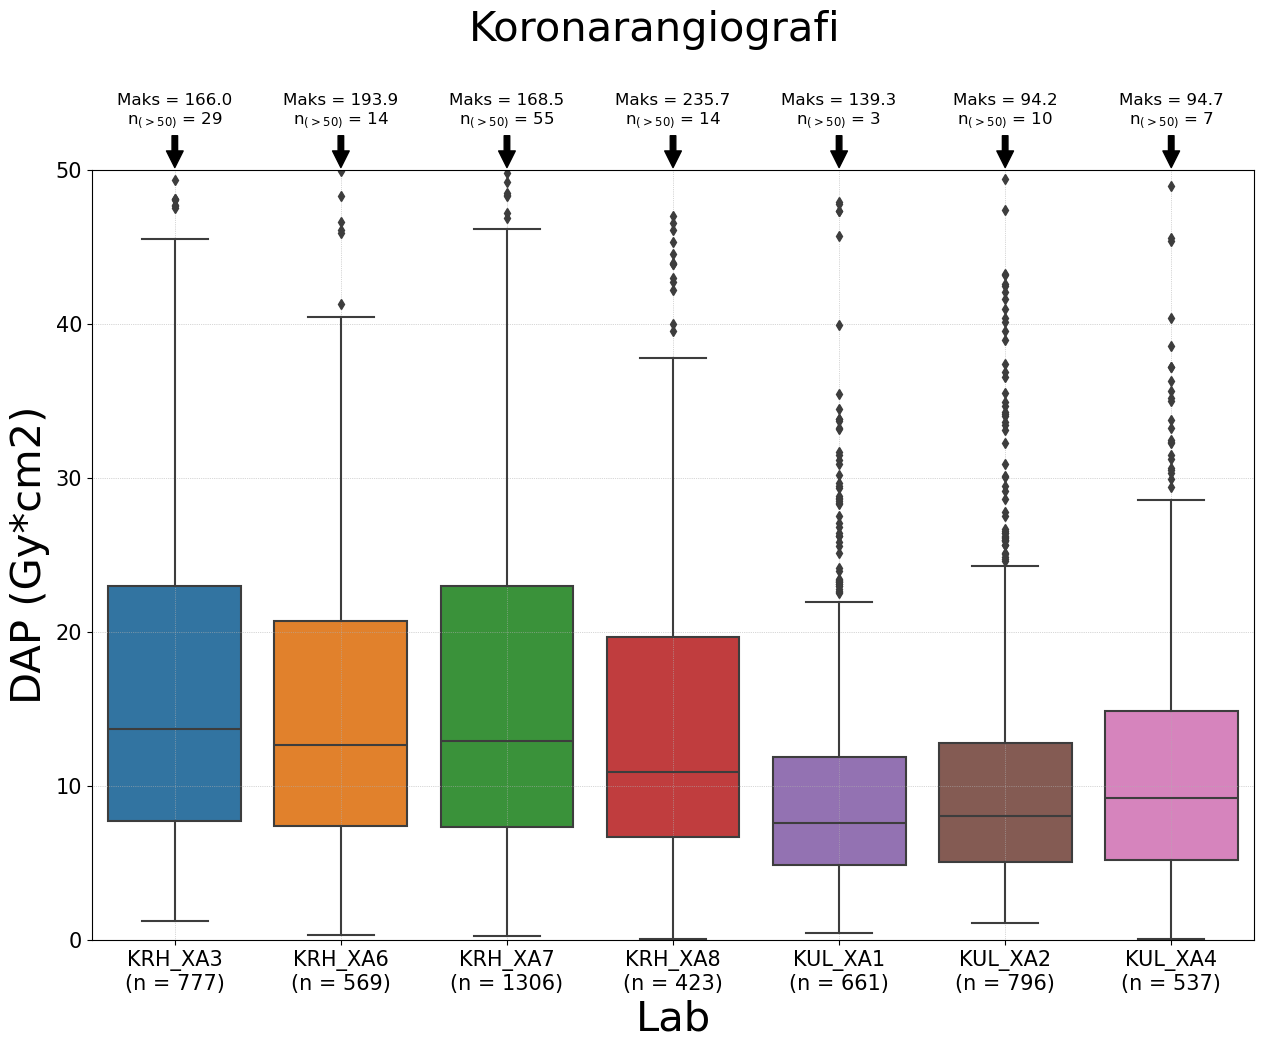

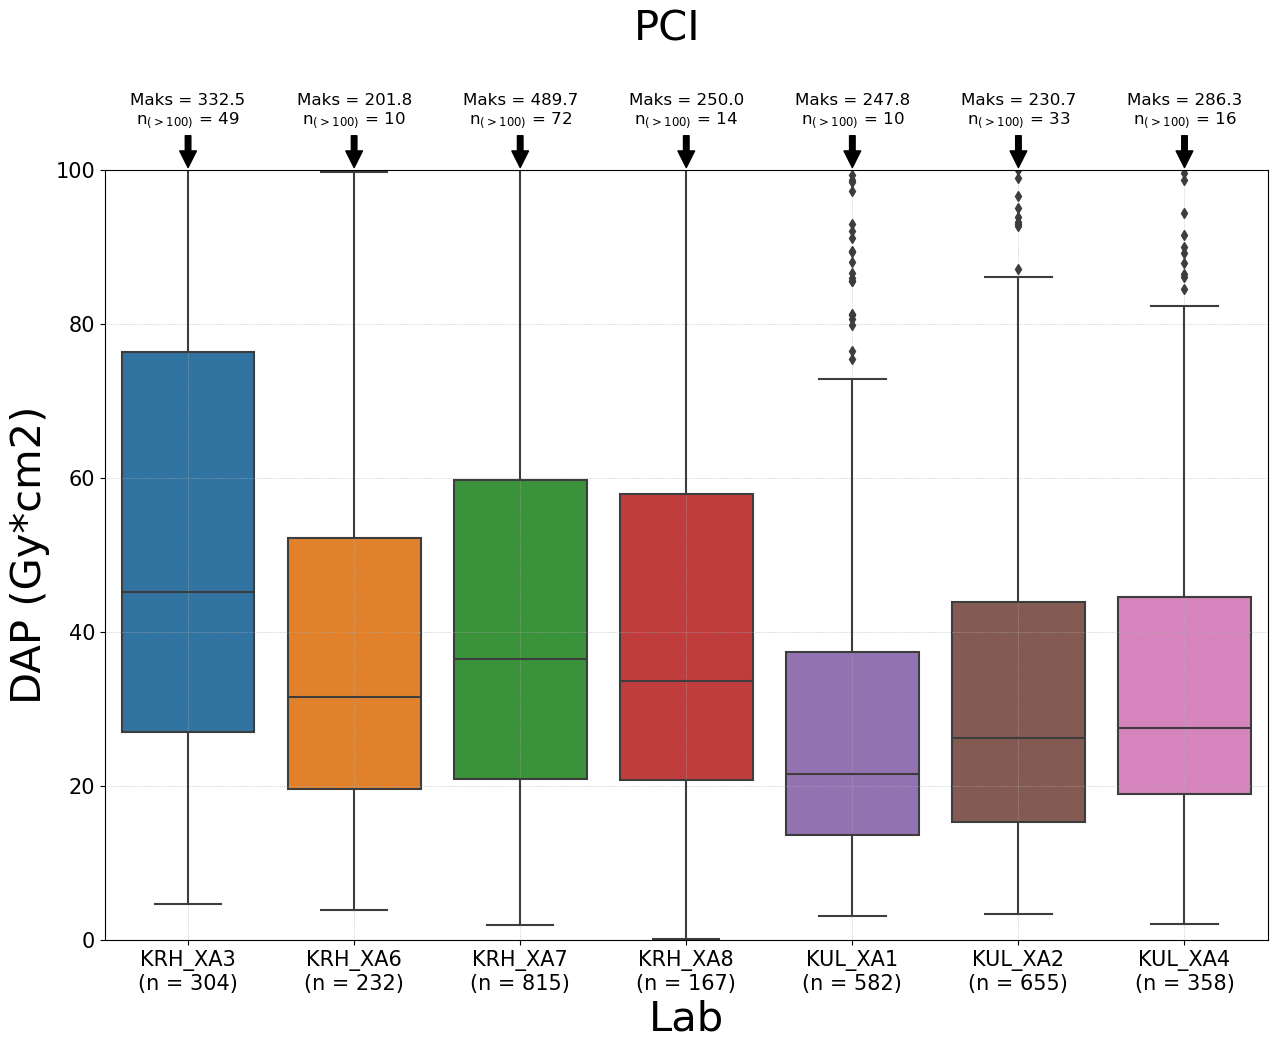

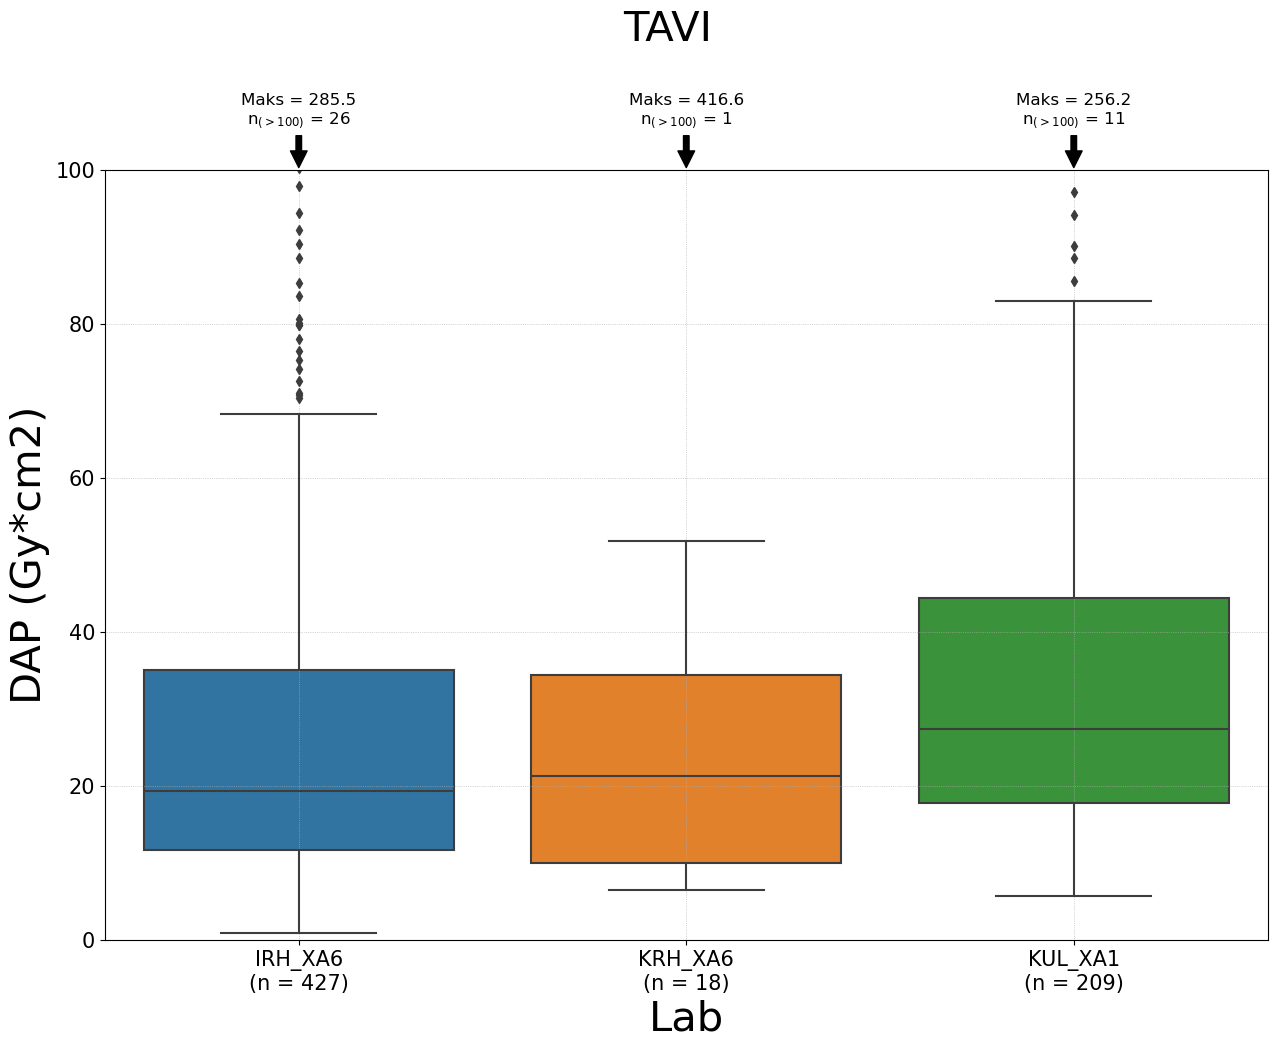

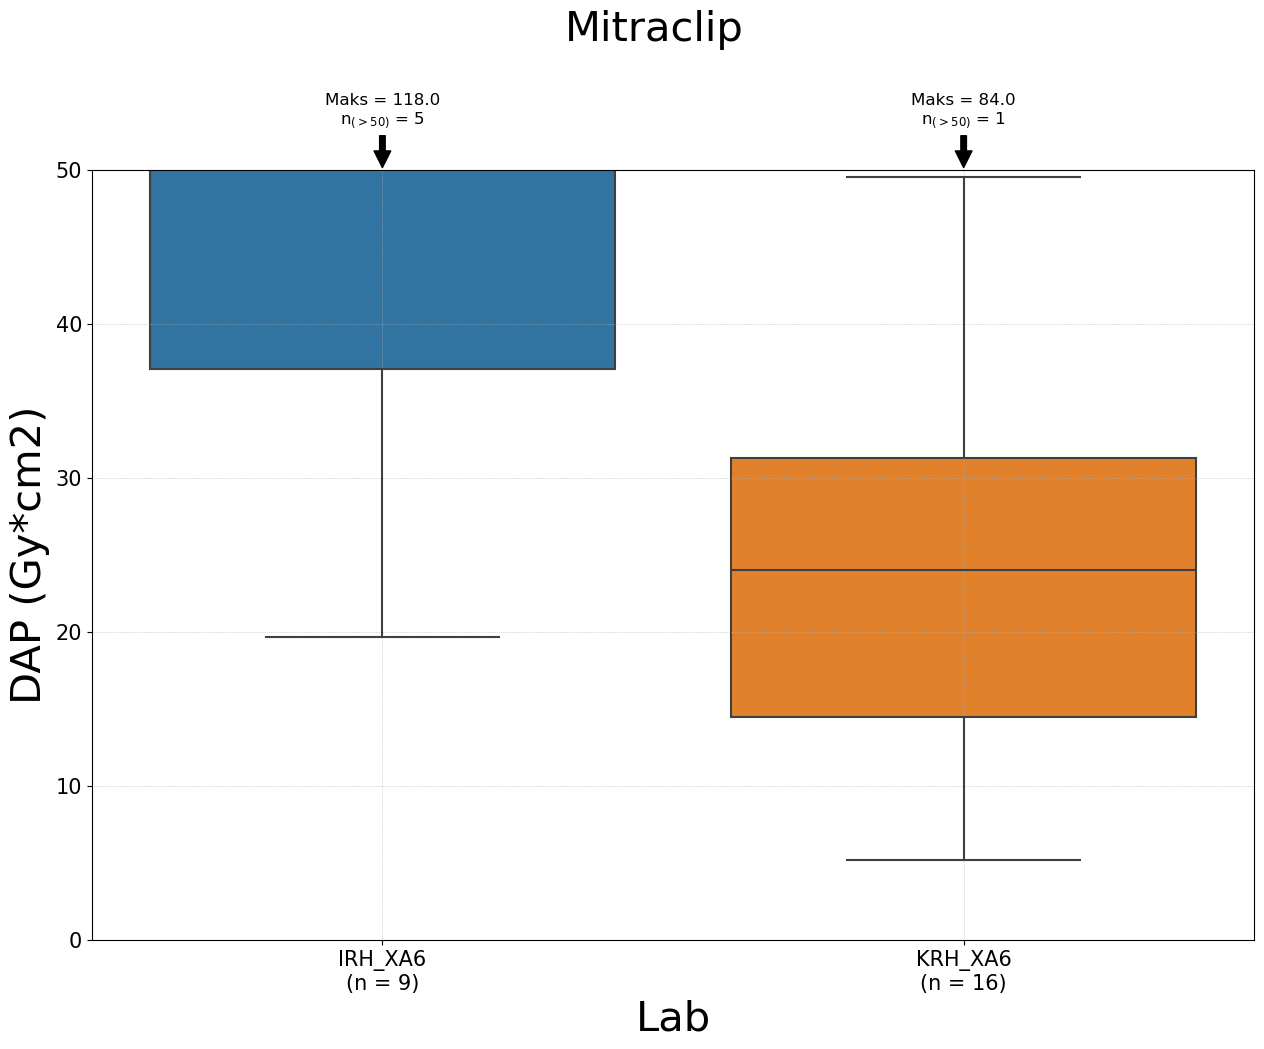

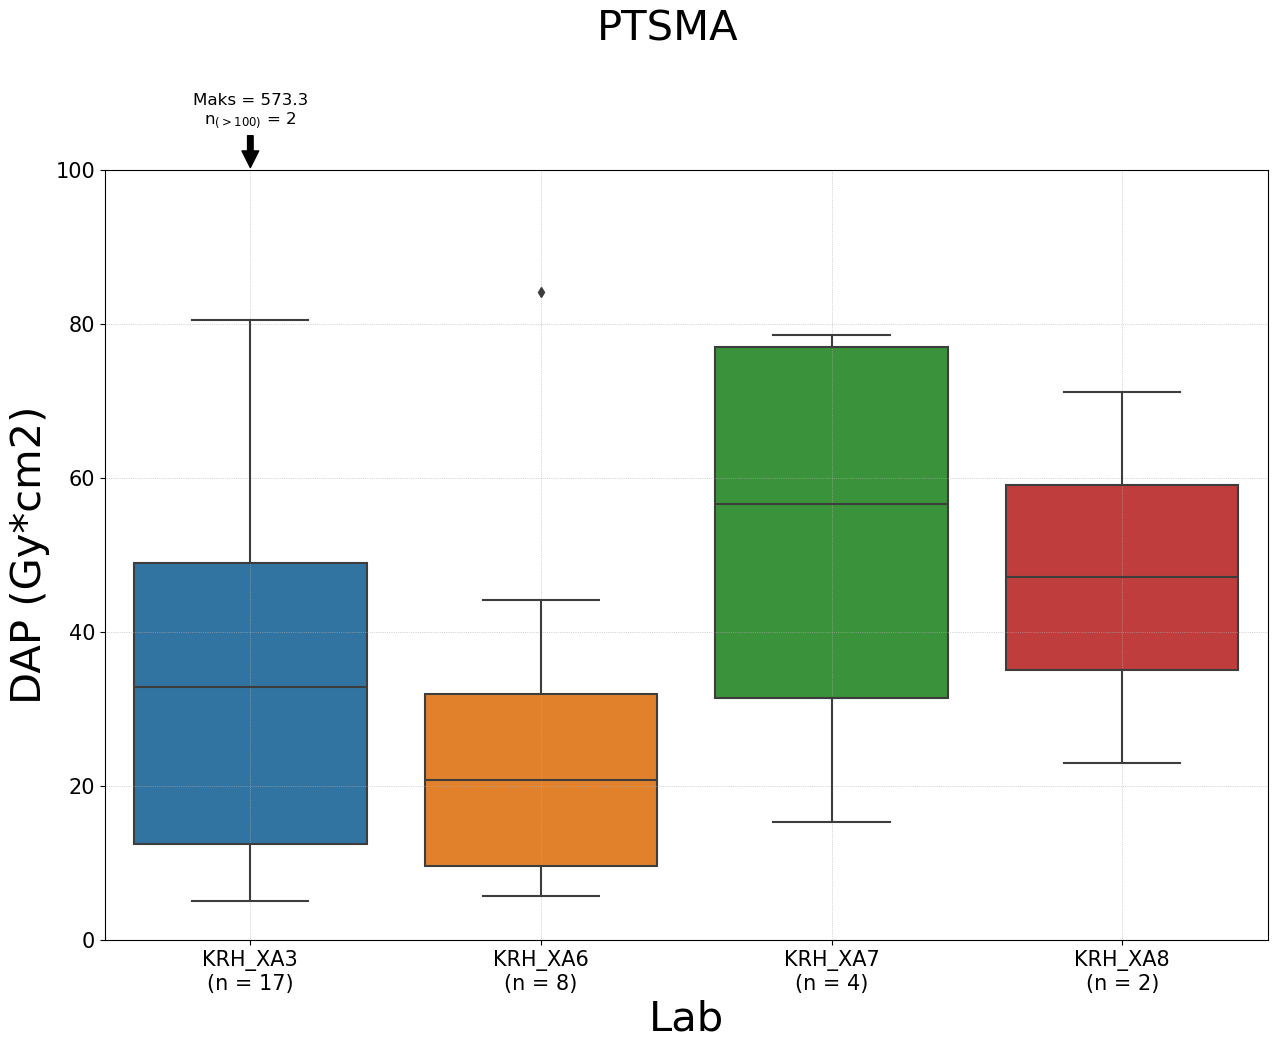

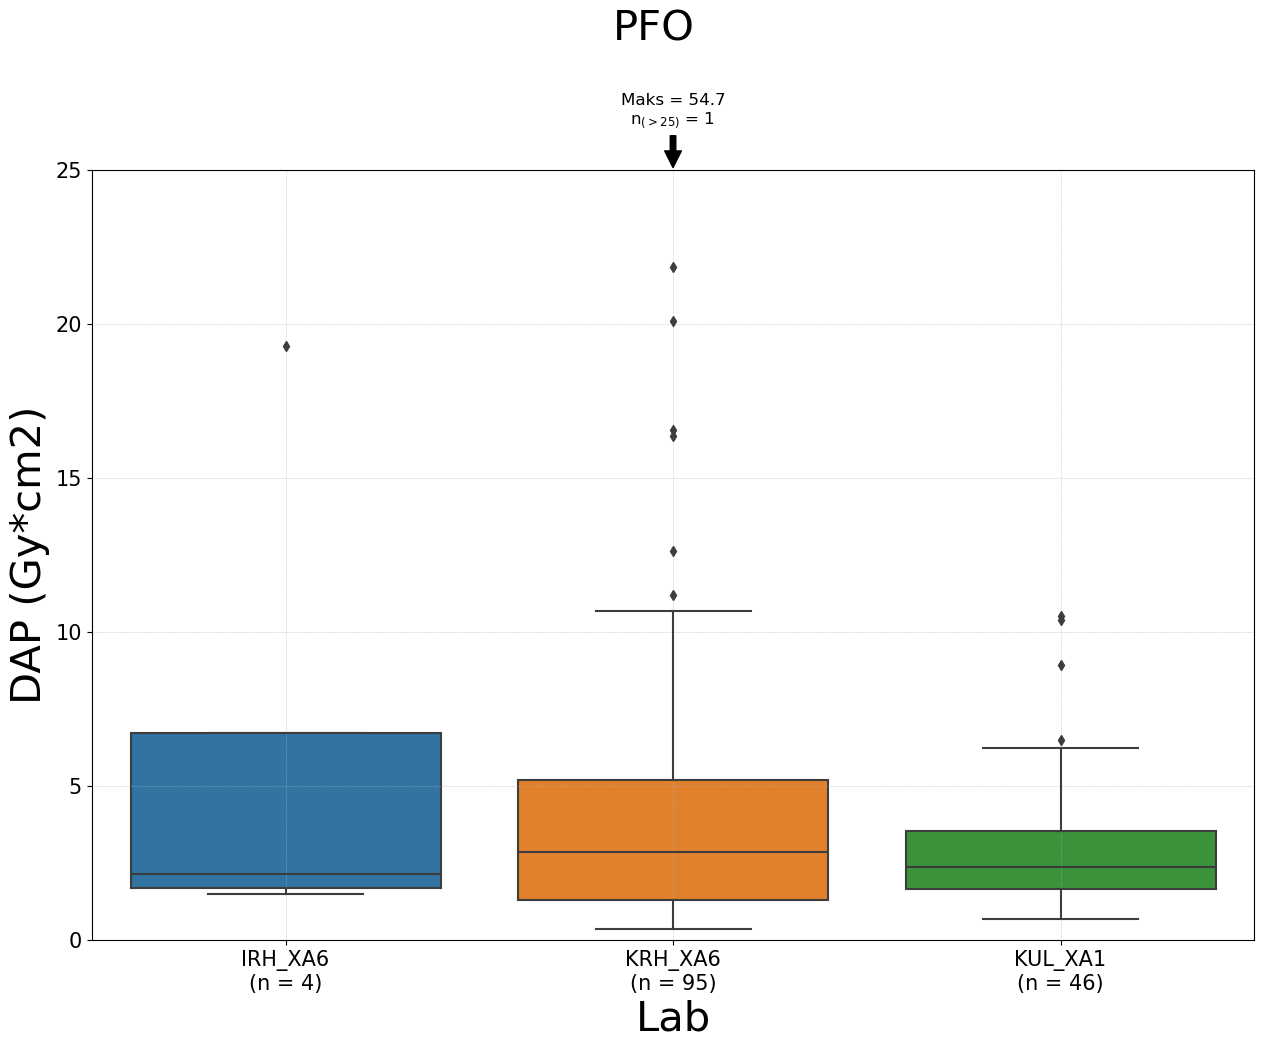

In [2]:
importlib.reload(bh_plot)
importlib.reload(bh_report)
def run_analysis(data, procedure, y):
    export = False
    bh_plot.plot_representative_dose(data, procedure, y, export)
    print('\n')
    bh_report.report_exposure_time_all(data[data['Mapped Procedures'] == procedure], True)
    print('\n')
    bh_report.report_exposure_time_per_lab(data[data['Mapped Procedures'] == procedure], True)
    print('\n')
    print('###############################################')
    print('\n')
    

run_analysis(data, 'Koronarangiografi', 50)
run_analysis(data, 'PCI', 100)
run_analysis(data, 'TAVI', 75)
run_analysis(data, 'Mitraclip', 100)
run_analysis(data, 'PTSMA', 100)
run_analysis(data, 'PFO', 20)


In [ ]:
importlib.reload(bh_plot)
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data, procedure, 50, export)
print('\n')
bh_report.report_exposure_time_all(data[data['Mapped Procedures'] == procedure], True)
print('\n')
bh_report.report_exposure_time_per_lab(data[data['Mapped Procedures'] == procedure], True)


In [ ]:
procedure = 'TAVI'
export = False
bh_plot.plot_representative_dose(data, procedure, 100, export)
print('\n')
bh_report.report_exposure_time_all(data[data['Mapped Procedures'] == procedure], True)
print('\n')
bh_report.report_exposure_time_per_lab(data[data['Mapped Procedures'] == procedure], True)


In [ ]:
procedure = 'Mitraclip'
export = False
bh_plot.plot_representative_dose(data, procedure, 100, export)
print('\n')
bh_report.report_exposure_time_all(data[data['Mapped Procedures'] == procedure], True)
print('\n')
bh_report.report_exposure_time_per_lab(data[data['Mapped Procedures'] == procedure], True)


In [ ]:
importlib.reload(bh_plot)
importlib.reload(bh_report)
procedure = 'PTSMA'
export = False
bh_plot.plot_representative_dose(data, procedure, 100, export)
print('\n')
bh_report.report_exposure_time_all(data[data['Mapped Procedures'] == procedure], True)
print('\n')
bh_report.report_exposure_time_per_lab(data[data['Mapped Procedures'] == procedure], True)


In [ ]:
procedure = 'PFO'
export = False
bh_plot.plot_representative_dose(data, procedure, 25, export)
print('\n')
bh_report.report_exposure_time_all(data[data['Mapped Procedures'] == procedure], True)
print('\n')
bh_report.report_exposure_time_per_lab(data[data['Mapped Procedures'] == procedure], True)
